<a href="https://colab.research.google.com/github/andysingal/PyTorch-ML/blob/main/PyTorch_course_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is PyTorch ?
PyTorch is a python library for scientific computing that offers flexibility and speed. It's two main offerings are a high level tensor library with strong GPU acceleration and a automatic differentiation system for computational graphs.

Reasons to use:

Deep python integration with minimal framework overhead and links with external libraries like NVIDIA (CuDNN, etc.).

Imperative style makes it very flexible and transparent. You see exactly what is going to be run.

Dynamic computation graphs makes a a graph for each instance (or minibatch) and is efficient for tasks with variable amounts of work per sample.



In [77]:
%%capture
!pip install d2l==1.0.0b0


In [78]:
%%capture
!pip install pycrayon

In [79]:
import sys
import os
import sys
import random
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
from matplotlib_inline import backend_inline
from d2l import torch as d2l


from pycrayon import (
    CrayonClient,
)

from IPython import (
    display,
)

from IPython.display import (
    Image,
    clear_output,
)

sys.path.insert(0, '..')
# get matplotlib configuration
%matplotlib inline
%run plot_conf.py

ERROR:root:File `'plot_conf.py'` not found.


In [80]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import (
    Variable,
)
from torch.nn import (
    init,
)

#PyTorch basics
http://pytorch.org/docs/

Tensors

In [81]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

#Each of these values is called an element of the tensor. The tensor x contains 12 elements. We can inspect the total number of elements in a tensor via its numel method.

In [82]:
x.numel()

12

In [83]:
X = x.reshape(3, 4)

#SLICING

In [84]:
X[-1],X[1:3]

(tensor([ 8.,  9., 10., 11.]), tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [85]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [86]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [87]:
# tensor of ones
x= torch.ones(4,3)
print(x.size(),x.size(0),x.size(1),x)

torch.Size([4, 3]) 4 3 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [88]:
# random tensors
w = torch.rand(3, 2)
print(w)

tensor([[0.5544, 0.5574],
        [0.1269, 0.5309],
        [0.9862, 0.6265]])


In [89]:
torch.randn(3, 4)

tensor([[ 1.1969, -1.4121,  0.1466,  0.2291],
        [ 0.0720,  0.1270,  0.7452, -0.8531],
        [ 1.1145,  0.8279,  1.5421,  0.1909]])

In [90]:
a = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
a.ndim,a.shape

(2, torch.Size([3, 4]))

In [91]:
torch.arange(start=1, end=11,step=1)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [92]:
float_tensor = torch.tensor([3.0,6.0,9.0],
                            dtype=None, device=None,requires_grad=False)


#Tensor aggregation

In [93]:
# Create a tensor
x1 = torch.arange(0, 100, 10)
x1

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [94]:
x.max()

tensor(1.)

In [95]:
x.type(torch.float32).mean()

tensor(1.)

In [96]:
#position 
x.argmin(),x.argmax()

(tensor(0), tensor(0))

In [97]:
x2 = torch.arange(1,10)
x2, x2.shape

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]))

In [98]:
x_reshaped = x2.reshape(1,9)
x_reshaped.shape

torch.Size([1, 9])

In [99]:
x_squeezed = x_reshaped.squeeze()

In [100]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Previous shape: torch.Size([9])

New tensor: tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])
New shape: torch.Size([1, 9])


In [101]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [102]:
x_original[0,0,0],x_permuted[0,0,0]

(tensor(0.7741), tensor(0.7741))

In [103]:
x3 = torch.arange(1,10).reshape(1,3,3)
x3, x3.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]), torch.Size([1, 3, 3]))

In [104]:
x3[0][2][2]

x3[:,:,2]

tensor([[3, 6, 9]])

In [105]:
array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array)
array,tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

#Tensor operations

In [106]:
torch.exp(x)

tensor([[2.7183, 2.7183, 2.7183],
        [2.7183, 2.7183, 2.7183],
        [2.7183, 2.7183, 2.7183],
        [2.7183, 2.7183, 2.7183]])

In [107]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [108]:
# tensor addition
print(torch.add(x, x))

tensor([ 2.,  4.,  8., 16.])


In [109]:
# # matrix multiplication
# z = x.mm(w) 
# print(z)

In [110]:
X = torch.arange(12,dtype=torch.float32).reshape(3,4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)


(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [111]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

#RANDOMNESS

In [112]:
torch.rand(3,3)

tensor([[0.8033, 0.6779, 0.1668],
        [0.6201, 0.0718, 0.9028],
        [0.1886, 0.9134, 0.6592]])

In [113]:
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)
random_tensor_A == random_tensor_B

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

#Run the code in this section. Change the conditional statement X == Y to X < Y or X > Y, and then see what kind of tensor you can get.

In [114]:
X = torch.arange(15).reshape(5,3)

Y = torch.arange(15, 0, -1).reshape(5,3)

X == Y, X > Y, X < Y

(tensor([[False, False, False],
         [False, False, False],
         [False, False, False],
         [False, False, False],
         [False, False, False]]), tensor([[False, False, False],
         [False, False, False],
         [False, False,  True],
         [ True,  True,  True],
         [ True,  True,  True]]), tensor([[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True, False],
         [False, False, False],
         [False, False, False]]))

#Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

In [115]:
X = torch.arange(8).reshape(4, 2, 1)
Y = torch.arange(8).reshape(1, 2 ,4)

print(f"{X}, \n\n\n{Y}, \n\n\n{X + Y}")


tensor([[[0],
         [1]],

        [[2],
         [3]],

        [[4],
         [5]],

        [[6],
         [7]]]), 


tensor([[[0, 1, 2, 3],
         [4, 5, 6, 7]]]), 


tensor([[[ 0,  1,  2,  3],
         [ 5,  6,  7,  8]],

        [[ 2,  3,  4,  5],
         [ 7,  8,  9, 10]],

        [[ 4,  5,  6,  7],
         [ 9, 10, 11, 12]],

        [[ 6,  7,  8,  9],
         [11, 12, 13, 14]]])


#LINEAR ALGEBRA
https://medium.com/codex/tensor-basics-in-pytorch-252a34288f2

In [116]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

#Vectors
For our purposes, you can think of vectors as fixed-length arrays of scalars. As with their code counterparts, we call these values the elements of the vector (synonyms include entries and components). When vectors represent examples from real-world datasets, their values hold some real-world significance. For example, if we were training a model to predict the risk of a loan defaulting, we might associate each applicant with a vector whose components correspond to quantities like their income, length of employment, or number of previous defaults. If we were studying heart attack risk, each vector might represent a patient and its components might correspond to their most recent vital signs, cholesterol levels, minutes of exercise per day, etc. We denote vectors by bold lowercase letters, (e.g., 
, 
, and 
).

Vectors are implemented as 
-order tensors. In general, such tensors can have arbitrary lengths, subject to memory limitations. Caution: in Python, like in most programming languages, vector indices start at 
, also known as zero-based indexing, whereas in linear algebra subscripts begin at 
 (one-based indexing).

In [117]:
x = torch.arange(3)
x

tensor([0, 1, 2])

#MATRICES

In [118]:
A = torch.arange(6).reshape(3,2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [119]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

#Tensors
While you can go far in your machine learning journey with only scalars, vectors, and matrices, eventually you may need to work with higher-order tensors. Tensors give us a generic way to describe extensions to 
-order arrays. We call software objects of the tensor class “tensors” precisely because they too can have arbitrary numbers of axes. While it may be confusing to use the word tensor for both the mathematical object and its realization in code, our meaning should usually be clear from context. We denote general tensors by capital letters with a special font face (e.g., 
, 
, and 
) and their indexing mechanism (e.g., 
 and 
) follows naturally from that of matrices.

Tensors will become more important when we start working with images. Each image arrives as a 
-order tensor with axes corresponding to the height, width, and channel. At each spatial location, the intensities of each color (red, green, and blue) are stacked along the channel. Moreover a collection of images is represented in code by a 
-order tensor, where distinct images are indexed along the first axis. Higher-order tensors are constructed analogously to vectors and matrices, by growing the number of shape components.

In [120]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [121]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of `A` to `B` by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]), tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [122]:
x = torch.arange(3,dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [123]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [124]:
A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

#Non-Reduction Sum

In [125]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]), torch.Size([2, 1]))

#DOT

In [126]:
y = torch.ones(3, dtype = torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [127]:
torch.sum(x * y)

tensor(3.)

#Matrix-Vector Products¶
PyTorch has a convenience operator @ that can execute both matrix-vector and matrix-matrix products (depending on its arguments). Thus we can write A@x.



In [128]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [129]:
B = torch.ones(3, dtype = torch.float32)
torch.mv(A,B), A@B

(tensor([ 3., 12.]), tensor([ 3., 12.]))

In [130]:
torch.matmul(torch.rand(3,2),torch.rand(2,3))

tensor([[0.3699, 0.4396, 0.2878],
        [0.3016, 0.5181, 0.5665],
        [0.2613, 0.5800, 0.7632]])

In [131]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)
print(tensor_B.T)

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [132]:
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


#Norms
Some of the most useful operators in linear algebra are norms. Informally, the norm of a vector tells us how big it is. For instance, the 
 norm measures the (Euclidean) length of a vector. Here, we are employing a notion of size that concerns the magnitude of a vector’s components (not its dimensionality).

In [133]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [134]:
torch.abs(u).sum()

tensor(7.)

#EXERCISE:
(A.T).T = A

In [135]:
A = torch.arange(6).reshape(3, 2)
A.shape

torch.Size([3, 2])

In [136]:
(A.T).T

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [137]:
B = torch.ones(3, 2)
B.shape

torch.Size([3, 2])

In [138]:
A.T,B.T

(tensor([[0, 2, 4],
         [1, 3, 5]]), tensor([[1., 1., 1.],
         [1., 1., 1.]]))

In [139]:
A.T + B.T

tensor([[1., 3., 5.],
        [2., 4., 6.]])

In [140]:
A + B

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [141]:
(A + B).T

tensor([[1., 3., 5.],
        [2., 4., 6.]])

We defined the tensor $ \mathsf{X} $ of shape (2, 3, 4) in this section. What is the output of len(X)? Write your answer without implementing any code, then check your answer using code.

In [142]:
X = torch.tensor([2,3,4])
X

tensor([2, 3, 4])

In [143]:
# A / A.sum(axis=1)

In [144]:
# distances of avenues and streets

dist_ave = 30.0

dist_str = 40.0

dis_2pt = torch.tensor([dist_ave, dist_str])

torch.abs(dis_2pt).sum()

#Can. Fly straightly and diagonally.the â„“2 norm


torch.norm(dis_2pt)


tensor(50.)

Define three large matrices, say $ \mathbf{A} \in \mathbb{R}^{2^{10} \times 2^{16}} $ , $ \mathbf{B} \in \mathbb{R}^{2^{16} \times 2^{5}} $ and $ \mathbf{C} \in \mathbb{R}^{2^{5} \times 2^{16}} $. Is there any difference in speed depending on whether you compute $ \mathbf{A} \mathbf{B} $ or $ \mathbf{A} \mathbf{C}^\top $? Why? What changes if you initialize $ \mathbf{C} = \mathbf{B}^\top $ without cloning memory? Why?

In [145]:
import timeit
A = torch.randn(2**10,2**16)
B = torch.randn(2**16,2**5)
C = torch.randn(2**5,2**16)


In [146]:
C.T

tensor([[-0.7765,  1.1304, -1.1058,  ...,  1.3564,  0.5840, -0.1606],
        [-0.1731, -0.9823,  0.2417,  ...,  1.2117,  1.3935, -1.5320],
        [ 0.3956, -0.7942, -0.7254,  ..., -0.0590, -0.3692, -0.0904],
        ...,
        [-0.7175,  1.5627, -1.2257,  ...,  0.8239,  1.0217, -0.5860],
        [-0.8871,  1.1626,  0.7529,  ..., -0.4630, -0.4176, -2.3187],
        [-0.1881,  1.1722,  0.4419,  ..., -1.1727,  1.1701, -2.4888]])

In [147]:
%timeit A@B

65.5 ms ± 5.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [148]:
%timeit A@C.T

82.6 ms ± 8.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [149]:
Y= torch.arange(24,dtype = torch.float32).reshape(2, 3, 4)

torch.norm(Y)

tensor(65.7571)

In [150]:
%timeit C = B.T

2.57 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [151]:
A = torch.randn( (100, 200) )
B = torch.randn( (100, 200) )
C = torch.randn( (100, 200) )

stacked = torch.stack([ A, B, C ])
print(f"{stacked.shape = }")


stacked.shape = torch.Size([3, 100, 200])


#Cuda

In [152]:
# running on GPU
# if torch.cuda.is_available():
#     x = x.cuda()
#     w = w.cuda()
#     print(x.mm(w))

#Automatic differentiation



The autograd package is a key package for working with our computational graphs. It provides automatic differentiation for operations on tensors. Variable is the core class in the package and it wraps around our tensors. Once we defined our computations in the graph, we can call .backward() on our objective to calculate all the gradients automatically! We can always access the values in raw tensors with .data and the gradient w.r.t to our objective with .grad.

In [153]:
# Image(filename='/content/AD.png', width=300) 

In [154]:
# Creating a Variable
x = Variable(torch.ones(3, 3), requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [155]:
# + operation
y = x + 4
print(y)

tensor([[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)


In [156]:
# * and mean
z = y * 3
o = z.mean()
print(o)

tensor(15., grad_fn=<MeanBackward0>)


In [157]:
# Backward pass
o.backward()

In [158]:
# Gradients w.r.t o
print(x.grad)

tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])


In [159]:
# see the data and creator
print (x.data)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


#CALCULUS

In [160]:
def f(x):
  return 3 * x ** 2 - 4 * x

In [161]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


#2.4.2. Visualization Utilities
We can visualize the slopes of functions using the matplotlib library. We need to define a few functions. As its name indicates, use_svg_display tells matplotlib to output graphics in SVG format for crisper images. The comment #@save is a special modifier that allows us to save any function, class, or other code block to the d2l package so that we can invoke it later without repeating the code, e.g., via d2l.use_svg_display().



In [162]:
def use_svg_display():  
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [163]:
def set_figsize(figsize=(3.5, 2.5)):  
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [164]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [165]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if `X` (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None: axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

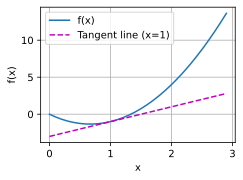

In [166]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

<ipython-input-167-bc5ae5cc3bd7>:2: RuntimeWarning: divide by zero encountered in true_divide
  plot(x, [f(x),  x**3 - 1/x], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


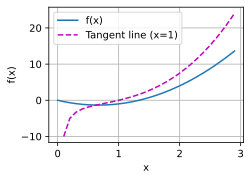

In [167]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x),  x**3 - 1/x], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

let’s use a simple tensor and set the requires_grad parameter to true. This allows us to perform automatic differentiation and lets PyTorch evaluate the derivatives using the given value which, in this case, is 3.0.

In [168]:
x = torch.tensor(3.0, requires_grad=True )
x

tensor(3., requires_grad=True)

In [169]:
y = 3 * x ** 2
print("Result of the equation is: ", y)
y.backward()
print("Dervative of the equation at x = 3 is: ", x.grad)

Result of the equation is:  tensor(27., grad_fn=<MulBackward0>)
Dervative of the equation at x = 3 is:  tensor(18.)


#Computational Graph
PyTorch generates derivatives by building a backwards graph behind the scenes, while tensors and backwards functions are the graph’s nodes. In a graph, PyTorch computes the derivative of a tensor depending on whether it is a leaf or not.

PyTorch will not evaluate a tensor’s derivative if its leaf attribute is set to True. We won’t go into much detail about how the backwards graph is created and utilized, because the goal here is to give you a high-level knowledge of how PyTorch makes use of the graph to calculate derivatives.

So, let’s check how the tensors x and y look internally once they are created. For x:

In [170]:
print('data attribute of the tensor:',x.data)
print('grad attribute of the tensor::',x.grad)
print('grad_fn attribute of the tensor::',x.grad_fn)
print("is_leaf attribute of the tensor::",x.is_leaf)
print("requires_grad attribute of the tensor::",x.requires_grad)

data attribute of the tensor: tensor(3.)
grad attribute of the tensor:: tensor(18.)
grad_fn attribute of the tensor:: None
is_leaf attribute of the tensor:: True
requires_grad attribute of the tensor:: True


In [171]:
x = torch.tensor(3.0, requires_grad = True)
y = 6 * x ** 2 + 2 * x + 4
print("Result of the equation is: ", y)
y.backward()
print("Derivative of the equation at x = 3 is: ", x.grad)

Result of the equation is:  tensor(64., grad_fn=<AddBackward0>)
Derivative of the equation at x = 3 is:  tensor(38.)


#Implementing Partial Derivatives of Functions
PyTorch also allows us to calculate partial derivatives of functions.

In [172]:
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(4., requires_grad=True)
 
f = u**3 + v**2 + 4*u*v
 
print(u)
print(v)
print(f)
 
f.backward()
print("Partial derivative with respect to u: ", u.grad)
print("Partial derivative with respect to v: ", v.grad)

tensor(3., requires_grad=True)
tensor(4., requires_grad=True)
tensor(91., grad_fn=<AddBackward0>)
Partial derivative with respect to u:  tensor(43.)
Partial derivative with respect to v:  tensor(20.)


#Derivative of Functions with Multiple Values
What if we have a function with multiple values and we need to calculate the derivative with respect to its multiple values? For this, we’ll make use of the sum attribute to (1) produce a scalar-valued function, and then (2) take the derivative. This is how we can see the ‘function vs. derivative’ plot:

Source:
-- https://machinelearningmastery.com/calculating-derivatives-in-pytorch/

-- https://androidkt.com/create-numpy-array-from-pytorch-tensor-using-detach-numpy/

--- https://medium.com/@pranav.kushare2001/solving-calculus-problems-using-pytorchs-automatic-differentiation-c672df970fda


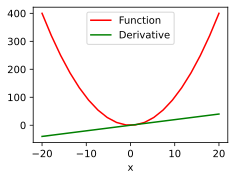

In [173]:
x = torch.linspace(-20, 20, 20, requires_grad = True)
Y = x ** 2
y = torch.sum(Y)
y.backward()

# ploting the function and derivative
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivative')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()

In [174]:
 a= torch.tensor(1,requires_grad=True,dtype=float)
 y = (1/torch.cos(torch.atan(a)))
 y.backward()
 a.grad



tensor(0.7071, dtype=torch.float64)

In [182]:
import torch

X = torch.rand(size=(7,7))
x.shape

Y = torch.rand(size=(1,7))
Y.T


tensor([[0.9785],
        [0.9495],
        [0.2643],
        [0.2797],
        [0.3577],
        [0.4719],
        [0.4709]])

In [183]:
Z = torch.matmul(X, Y.T) # no error because of transpose
Z, Z.shape


(tensor([[2.0203],
         [1.3354],
         [2.8562],
         [2.7670],
         [1.3645],
         [2.0234],
         [1.1493]]), torch.Size([7, 1]))

In [184]:
# Set manual seed
torch.manual_seed(0)

# Create two random tensors
X = torch.rand(size=(7, 7))
Y = torch.rand(size=(1, 7))

# Matrix multiply tensors
Z = torch.matmul(X, Y.T)
Z, Z.shape

(tensor([[1.8542],
         [1.9611],
         [2.2884],
         [3.0481],
         [1.7067],
         [2.5290],
         [1.7989]]), torch.Size([7, 1]))

In [185]:
# Set random seed
torch.manual_seed(1234)

# Check for access to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# Create two random tensors on GPU
tensor_A = torch.rand(size=(2,3)).to(device)
tensor_B = torch.rand(size=(2,3)).to(device)
tensor_A, tensor_B

Device: cuda


(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]], device='cuda:0'),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]], device='cuda:0'))

In [186]:
tensor_C = torch.matmul(tensor_A, tensor_B.T)
tensor_C, tensor_C.shape

(tensor([[0.3647, 0.4709],
         [0.5184, 0.5617]], device='cuda:0'), torch.Size([2, 2]))

In [188]:
max = torch.max(tensor_C)
min = torch.min(tensor_C)
max, min

(tensor(0.5617, device='cuda:0'), tensor(0.3647, device='cuda:0'))

In [189]:
# Find arg max
arg_max = torch.argmax(tensor_C)

# Find arg min
arg_min = torch.argmin(tensor_C)
arg_max, arg_min

(tensor(3, device='cuda:0'), tensor(0, device='cuda:0'))

In [190]:
# Set seed
torch.manual_seed(7)

# Create random tensor
tensor_D = torch.rand(size=(1, 1, 1, 10))

# Remove single dimensions
tensor_E = tensor_D.squeeze()

# Print out tensors
print(tensor_D, tensor_D.shape)
print(tensor_E, tensor_E.shape)

tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])
